# Analyzing Survey on Mental Health in the Tech Workplace

#### Presented By: Apoorv Goel, Harish Yadav, Nipun Soni

This data set is taken from [Kaggle.com](https://www.kaggle.com/osmi/mental-health-in-tech-survey). 
This is a dataset from a 2014 survey (over 1200 responses recieved) that measures attitudes towards mental health and frequency of mental health disorders in workplaces. 
<B>Goal</B><br>
Our goal is to find out the key factors to mental health problems in the workplace where techies work. We are going to do some descriptive statistics and predictive analytics on the survey data and predict treatment based on predictors. This will help in finding out methods to improve worker's experience in a tech workplace.

### About Data:
Over 1200 observations, 27 Columns.

**1. Timestamp**<br>
**2. Age**<br>
**3. Gender**<br>
**4. Country**<br>
**5. state**: If you live in the United States, which state or territory do you live in?<br>
**6. self_employed**: Are you self-employed?<br>
**7. family_history**: Do you have a family history of mental illness?<br>
**8. treatment**: Have you sought treatment for a mental health condition?<br>
**9. work_interfere**: If you have a mental health condition, do you feel that it interferes with
your work?<br>
**10. no_employees**: How many employees does your company or organization have?<br>
**11. remote_work**: Do you work remotely (outside of an office) at least 50% of the time?<br>
**12. tech_company**: Is your employer primarily a tech company/organization?<br>
**13. benefits**: Does your employer provide mental health benefits?<br>
**14. care_options**: Do you know the options for mental health care your employer provides?<br>
**15. wellness_program**: Has your employer ever discussed mental health as part of an
employee wellness program?<br>
**16. seek_help**: Does your employer provide resources to learn more about mental health
issues and how to seek help?<br>
**17. anonymity**: Is your anonymity protected if you choose to take advantage of mental
health or substance abuse treatment resources?<br>
**18. leave**: How easy is it for you to take medical leave for a mental health condition?<br>
**19. mental_health_consequence**: Do you think that discussing a mental health issue with
your employer would have negative consequences?<br>
**20. phys_health_consequence**: Do you think that discussing a physical health issue with
your employer would have negative consequences?<br>
**21. coworkers**: Would you be willing to discuss a mental health issue with your coworkers?<br>
**22. supervisor**: Would you be willing to discuss a mental health issue with your direct
supervisor(s)?<br>
**23. mental_health_interview**: Would you bring up a mental health issue with a potential
employer in an interview?<br>
**24. phys_health_interview**: Would you bring up a physical health issue with a potential
employer in an interview?<br>
**25. mental_vs_physical**: Do you feel that your employer takes mental health as seriously as
physical health?<br>
**26. obs consequence**: Have you heard of or observed negative consequences for coworkers
with mental health conditions in your workplace?<br>

### Credits:
Part of this code/insights has been taken from:<br>
https://www.kaggle.com/kairosart/machine-learning-for-mental-health <br>
http://scikit-learn.org/stable/ <br>
https://beckernick.github.io/logistic-regression-from-scratch/<br>
https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac
###### Individual contribution at code level is also provided wherever its taken

## 1. Importing Data

In [146]:
#Importing initial libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [147]:
#Import Data
df_survey_data = pd.read_csv('survey.csv', na_filter=False)
df_survey_data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NA,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NA
1,2014-08-27 11:29:37,44,M,United States,IN,NA,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NA
2,2014-08-27 11:29:44,32,Male,Canada,NA,NA,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NA
3,2014-08-27 11:29:46,31,Male,United Kingdom,NA,NA,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NA
4,2014-08-27 11:30:22,31,Male,United States,TX,NA,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NA


In [148]:
#Checking data row count
print(df_survey_data.shape)

(1259, 27)


In [149]:
#Checking distribution of the data
print(df_survey_data.describe())

                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11


In [150]:
#Looking at column datatypes
print(df_survey_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        1259 non-null object
self_employed                1259 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               1259 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null o

## Data Wrangling

There are lot of columns that has junk data. These all need to be cleaned up before we can get insights from data and build a predictive model.<Br>
Below are some of the techniques used to deal with abnormalities in data:<br>
1. Dropping Unnecessary columns
2. Removing outliers 
3. Renaming Categorical values

In [151]:
#Drop unnecessary columns
df_survey_data.drop(['Timestamp','comments','state'], axis=1, inplace=True)

In [152]:
df_survey_data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NA,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NA,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NA,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NA,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NA,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [153]:
#check for null values
df_survey_data.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

#### Age Column

Let's look at Age column values and see if there is anything to clean

In [154]:
#Check minimum and maximum values of age column
print(df_survey_data['Age'].min())
print(df_survey_data['Age'].max())

-1726
99999999999


In [155]:
#Let's look at the outliers in Age column. Age of employees are generally between 18 and 75.
df_survey_data[(df_survey_data['Age'] < 18) | (df_survey_data['Age'] > 75)]

#So, let's just pick all the records between 18 and 75
#df_survey_data = df_survey_data[(df_survey_data['Age'] >= 18) | (df_survey_data['Age'] <= 75)]
df_survey_data.drop(df_survey_data[(df_survey_data['Age'] < 18) | (df_survey_data['Age'] > 75)].index, inplace=True)

In [156]:
#Clean Gender Column
df_survey_data['Gender'].str.lower().unique()

array(['female', 'm', 'male', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'something kinda male?', 'cis male', 'woman',
       'mal', 'male (cis)', 'queer/she/they', 'non-binary', 'femake',
       'make', 'nah', 'enby', 'fluid', 'genderqueer', 'female ',
       'androgyne', 'agender', 'cis-female/femme', 'guy (-ish) ^_^',
       'male leaning androgynous', 'male ', 'man', 'trans woman', 'msle',
       'neuter', 'female (trans)', 'queer', 'female (cis)', 'mail', 'malr',
       'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [157]:
#Creating gender groups - This logic idea taken from:https://www.kaggle.com/kairosart/machine-learning-for-mental-health

gender_male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr",
            "cis man", "Cis Male", "cis male"]

gender_female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

gender_trans = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid",
             "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman",
             "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]

for (row, col) in df_survey_data.iterrows():

    if str.lower(col.Gender) in gender_male:
        df_survey_data['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in gender_female:
        df_survey_data['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in gender_trans:
        df_survey_data['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of unknown values
df_survey_data = df_survey_data[~df_survey_data['Gender'].isin(['A little about you', 'p'])]

print(df_survey_data['Gender'].unique())

['female' 'male' 'trans']


No     1091
Yes     142
NA       18
Name: self_employed, dtype: int64

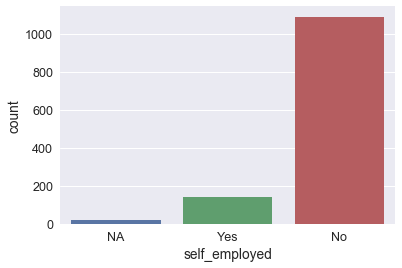

In [158]:
# Cleaning self_employed column
sns.countplot(df_survey_data['self_employed'])
df_survey_data['self_employed'].value_counts()

In [159]:
# Treating the 18 'NA' values for self_employed as Not Self employed i.e. 'No'
df_survey_data['self_employed'] = df_survey_data['self_employed'].replace('NA', 'No')
df_survey_data['self_employed'].value_counts()

No     1109
Yes     142
Name: self_employed, dtype: int64

Sometimes    464
NA           262
Never        212
Rarely       173
Often        140
Name: work_interfere, dtype: int64

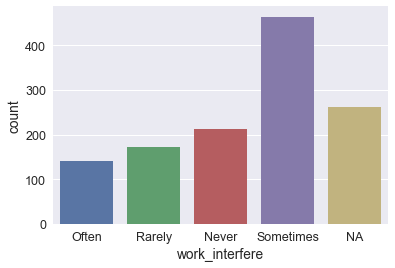

In [160]:
# Looking at work_interfere column
sns.countplot(df_survey_data['work_interfere'])
df_survey_data['work_interfere'].value_counts()

In [161]:
# Cleaning work_interfere column - replacing NAs with Unknown
df_survey_data['work_interfere'] = df_survey_data['work_interfere'].replace('NA', 'Unknown' )
df_survey_data['work_interfere'].value_counts()

Sometimes    464
Unknown      262
Never        212
Rarely       173
Often        140
Name: work_interfere, dtype: int64

In [162]:
#Creating Feature column as ranges of Age
df_survey_data['age_bins'] = pd.cut(df_survey_data['Age'], [0,20,40,60,80], 
                                    labels=["0-20", "21-40", "41-60","61-75"], include_lowest=True)

21-40    1081
41-60     144
0-20       22
61-75       4
Name: age_bins, dtype: int64

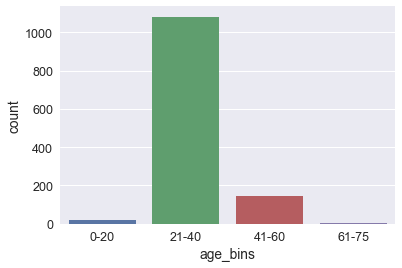

In [163]:
#looking at age bins
sns.countplot(df_survey_data['age_bins'])
df_survey_data['age_bins'].value_counts()

##### •	Most of the people working in tech industry who have responded to the survey fall between 21-40 years of age.

# Data Visualization

Some of the ideas have been taken from **[Kaggle.com Kernel](https://www.kaggle.com/lislejoem/recognition-of-importance-of-mental-health-in-us)**

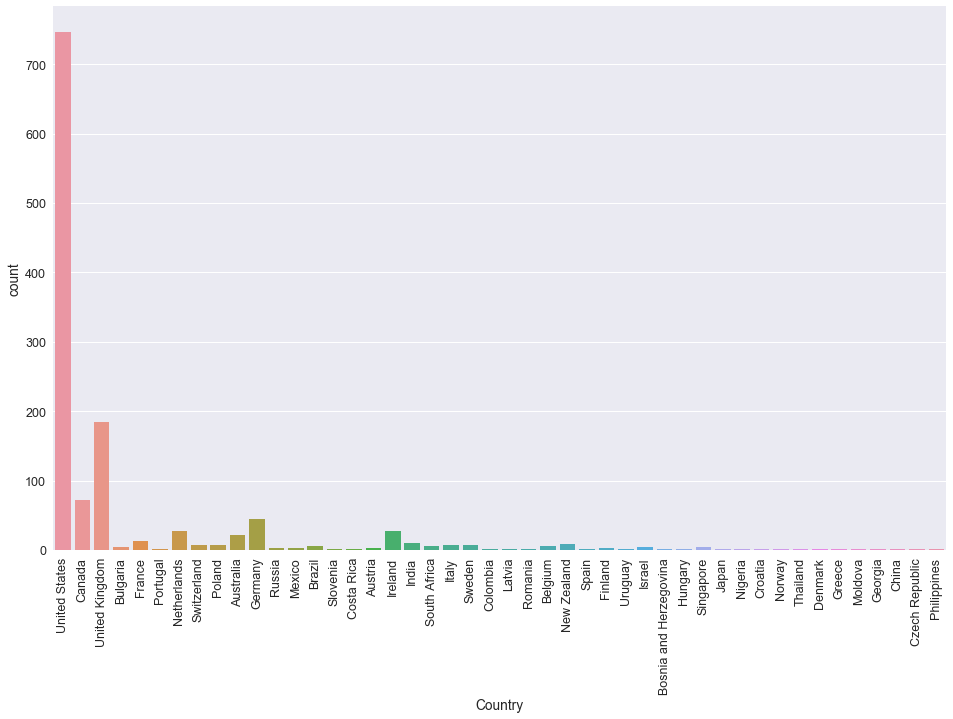

In [164]:
# Number of respondents w.r.t. country
plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
sns.countplot(df_survey_data['Country'])

##### Insight: A high percentage of the surveyors are from USA.

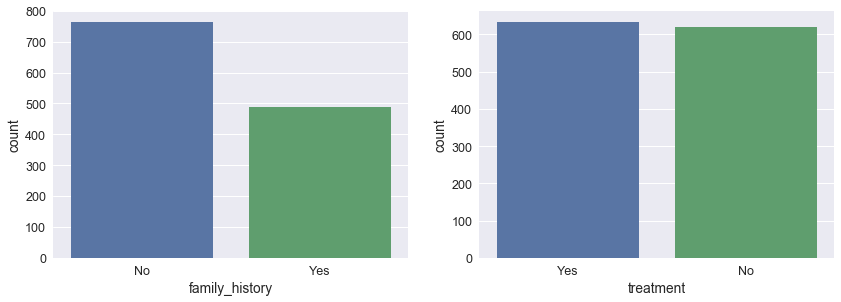

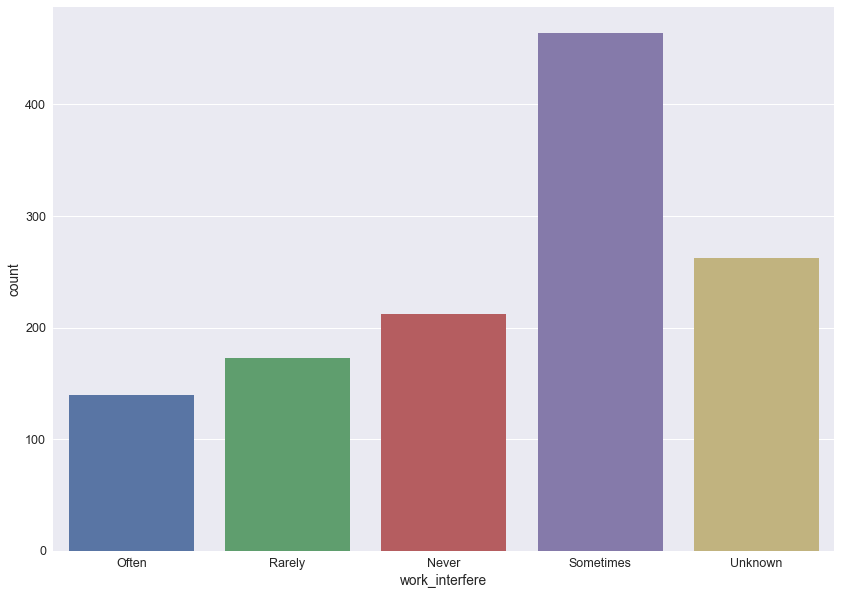

In [165]:
# Do you have a family history?
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.countplot(df_survey_data['family_history'])
# Have you sought treatment for a mental health condition?
plt.subplot(2,2,2)
sns.countplot(df_survey_data['treatment'])
plt.show()
plt.figure(figsize=(14,10))
sns.countplot(df_survey_data['work_interfere'])

#####  Insights:
**Most of the people in the tech industry do not have a family history of mental illness.<br>
More than 50% of the people surveyed are experiencing mental health issues, indicated by treatment.**

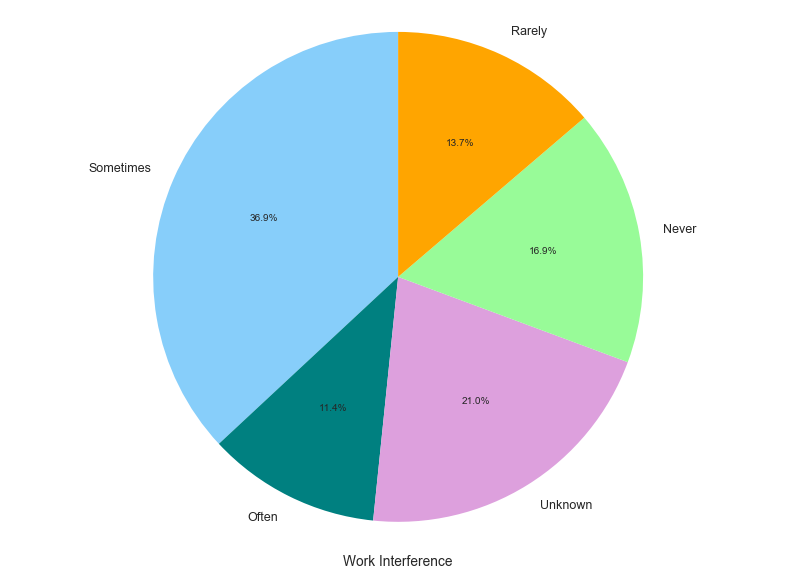

In [166]:
#If you have a mental health condition, do you feel that it interferes with your work?
labels= ['Sometimes', 'Often', 'Unknown', 'Never','Rarely']
colors=['lightskyblue', 'teal', 'plum', 'palegreen','orange']
sizes= [465,144,264,213,173]

plt.figure(figsize=(14,10))
plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.xlabel('Work Interference')
plt.show()

##### Insight: Close to 50% people claimed that they often encounter interference with their work due to their mental health issues.

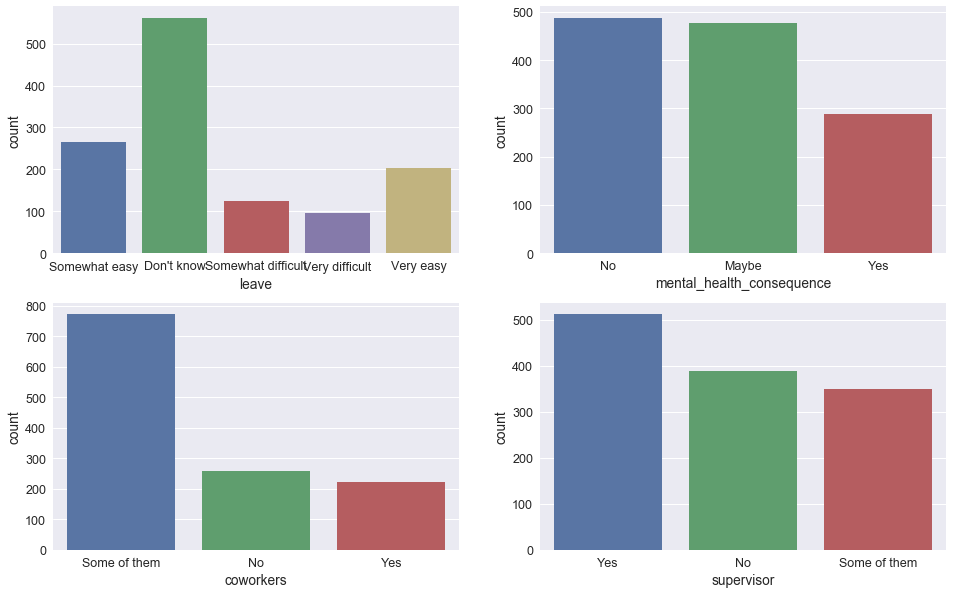

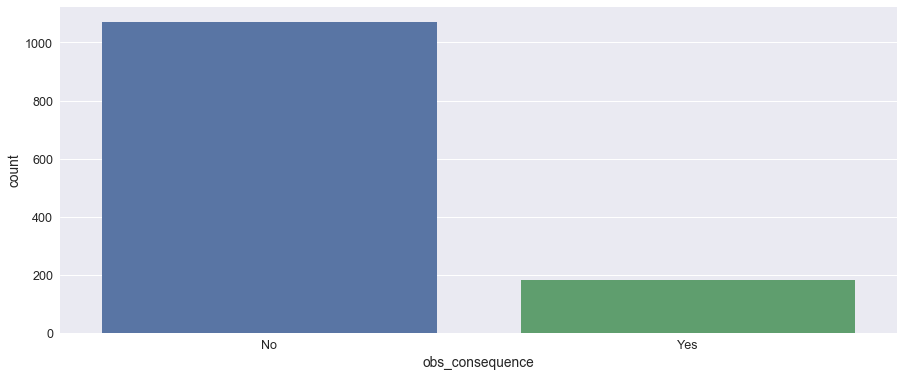

In [167]:
# How easy is it for you to take medical leave for a mental health condition?
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.countplot(df_survey_data['leave'])
# Do you think that discussing a mental health issue with your employer would have negative consequences?
plt.subplot(2,2,2)
sns.countplot(df_survey_data['mental_health_consequence'])
# Would you be willing to discuss a mental health issue with your coworkers?
plt.subplot(2,2,3)
sns.countplot(df_survey_data['coworkers'])
# Would you be willing to discuss a mental health issue with your direct supervisor(s)?
plt.subplot(2,2,4)
sns.countplot(df_survey_data['supervisor'])
# Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
plt.figure(figsize=(15,6))
sns.countplot(df_survey_data['obs_consequence'])

##### Insights:
**1. A large proportion of the surveyors think that there would be negative consequences for discussing a mental health issues with their employer while some are not sure about that.<br>**
**2. A large proportion of surveyors are willing to discuss their mental health with their co-workers, showing a positive and healthy work environment in most of the tech companies.<br>**
**4. More people are willing to discuss mental health issues with supervisors as compared to discussion with the co-workers.<br>**
**5. Majority of people have not seen negative consequences for co-workers with mental health issues in their workplace.**

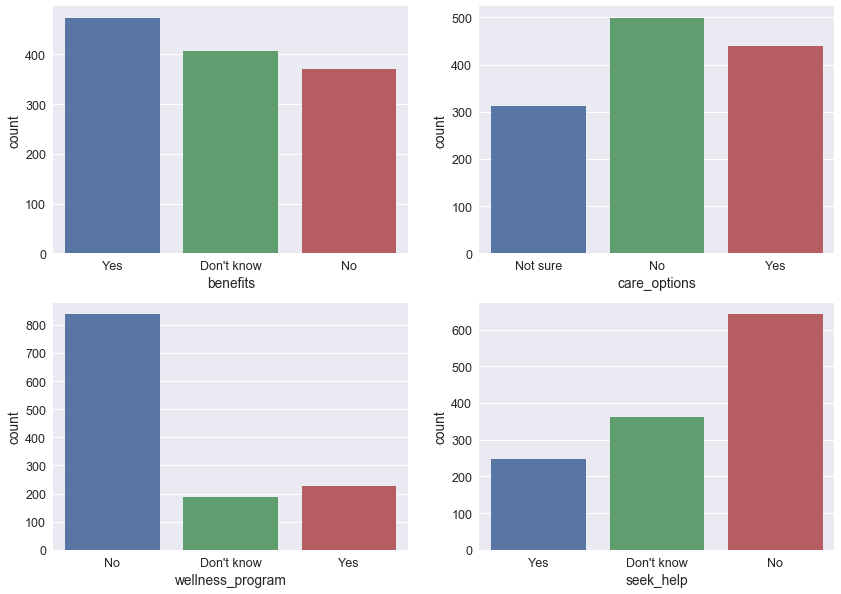

In [168]:
# Does your employer provide mental health benefits?
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.countplot(df_survey_data['benefits'])
# Do you know the options for mental health care your employer provides?
plt.subplot(2,2,2)
sns.countplot(df_survey_data['care_options'])
# Has your employer ever discussed mental health as part of an employee wellness program?
plt.subplot(2,2,3)
sns.countplot(df_survey_data['wellness_program'])
#Does your employer provide resources to learn more about mental health issues and how to seek help?
plt.subplot(2,2,4)
sns.countplot(df_survey_data['seek_help'])

##### Insights:
**1. Most of the respondents indicated that their employer provides mental health benefits.<br>**
**2. Majority of respondents don’t know if their employer provides options for mental health care.<br>**
**3. A great number of people report that employers are not discussing mental health as a part of an employee wellness program, showing lack of awareness by the employers towards their employees.<br>**
**4. Quite surprisingly, larger number of employers doesn’t provide any resources to learn about the mental issues and how to seek help to their employees, which again shows the lack of awareness towards mental health issues.**

## Data Prepartion

In this section, data is prepared for machine learning. We have done **Label Encoding**. Most machine learning algorithms work on numerical data. So, we are converting categorical data to numeric values(1, 2, 3...) using Label Encoder from scikit learn package of python.

We have also used seaborn package to see correlation between features.

In [169]:
#convert column categories to numeric using Label Encoder
from sklearn.preprocessing import LabelEncoder

#Reference: http://pbpython.com/categorical-encoding.html
encoder = LabelEncoder()
for col in df_survey_data.columns:
    df_survey_data[col] = encoder.fit_transform(df_survey_data[col])

In [170]:
# Checking after encoding
df_survey_data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_bins
0,19,0,44,0,0,1,1,4,0,1,...,2,1,1,1,2,1,0,2,0,1
1,26,1,44,0,0,0,2,5,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,6,0,0,0,2,4,0,1,...,1,1,1,2,2,2,2,1,0,1
3,13,1,43,0,1,1,1,2,0,1,...,1,2,2,1,0,0,0,1,1,1
4,13,1,44,0,0,0,0,1,1,1,...,0,1,1,1,2,2,2,0,0,1


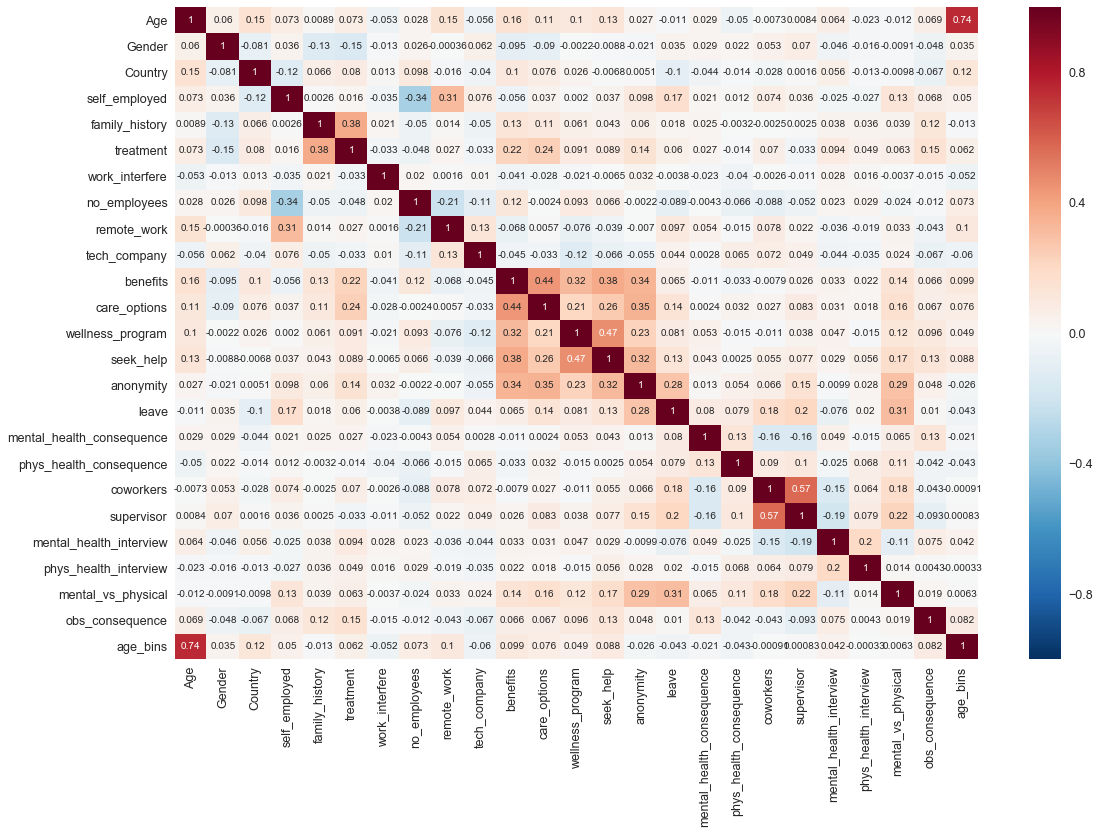

In [171]:
# Making a Correlation HeatMap to identify realtions between different Columns.
plt.subplots(figsize=(18, 12))
sns.heatmap(df_survey_data.corr(), annot = True);

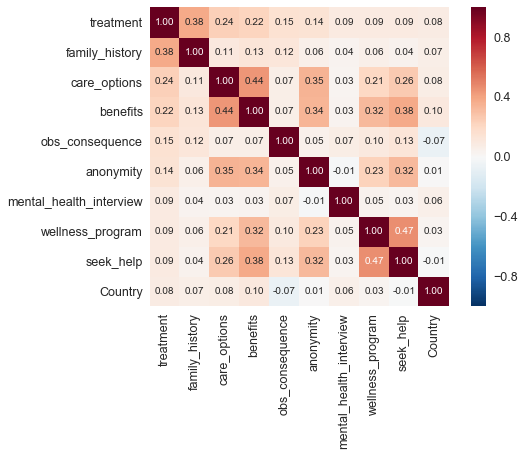

In [172]:
# Correlation HeatMap with top 10 features w.r.t treatment column
k = 10 #number of variables for heatmap
cols = df_survey_data.corr().nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(df_survey_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [173]:
#Identifying the 10 most important columns w.r.t treatment
#Idea taken from https://www.kaggle.com/ddmngml/trying-to-predict-used-car-value/notebook
df_survey_data.corr().loc[:,'treatment'].sort_values(ascending=False)[1:].head(10)

family_history             0.376674
care_options               0.235429
benefits                   0.224731
obs_consequence            0.152524
anonymity                  0.142364
mental_health_interview    0.093528
wellness_program           0.091278
seek_help                  0.089175
Country                    0.080316
Age                        0.072955
Name: treatment, dtype: float64

## Feature Scaling

In [174]:
# Scaling Age as its range is different from other column values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_survey_data['Age'] = scaler.fit_transform(df_survey_data[['Age']])
df_survey_data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_bins
0,0.431818,0,44,0,0,1,1,4,0,1,...,2,1,1,1,2,1,0,2,0,1
1,0.590909,1,44,0,0,0,2,5,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,6,0,0,0,2,4,0,1,...,1,1,1,2,2,2,2,1,0,1
3,0.295455,1,43,0,1,1,1,2,0,1,...,1,2,2,1,0,0,0,1,1,1
4,0.295455,1,44,0,0,0,0,1,1,1,...,0,1,1,1,2,2,2,0,0,1


## Machine Learning Modelling

<u>Data Split</u>: 70:30 ratio<br>
Used CrossValidation to tune models<br>
<u>Models</u>:<br> Logistic Regression<br>
        Self Implementation of Logistic Regression<br>
        ExtraTree Classifier<br>
        DecisionTree Classifier<br>
        RamdomForest Classifier<br>
        Bagging<br>
        Boosting/AdaBoost<br>

In [175]:
# split X and Y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_survey_data.drop(['treatment'], axis = 1), 
                                                    df_survey_data["treatment"], test_size=0.30, random_state=0)

#Created for a final plot for all models to be used at the end
methodDict = {}

In [176]:
#Creating a generalized Evaluation metrics for all model predictions
#Idea taken from https://www.kaggle.com/kairosart/machine-learning-for-mental-health

from sklearn import metrics

def evalClassModel(model, y_test, y_pred_class):
    
   # visualize Confusion Matrix
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    
    #[row, column] for confusion metrics
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    sns.heatmap(confusion,annot=True,fmt="d")   #Heatmap to visualize confusion matrix
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()   
    
    # calculate accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Accuracy:',accuracy )
     
    #Classification Error
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    #False Positive Rate
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    #Precision
    print('Precision:', metrics.precision_score(y_test, y_pred_class))    

    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
     ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################   
    
    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)    

    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # we pass y_test and y_pred_prob
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    plt.figure()        
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for treatment classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc="lower right")
    plt.show()
    
    return accuracy

## Logistic Regression Model

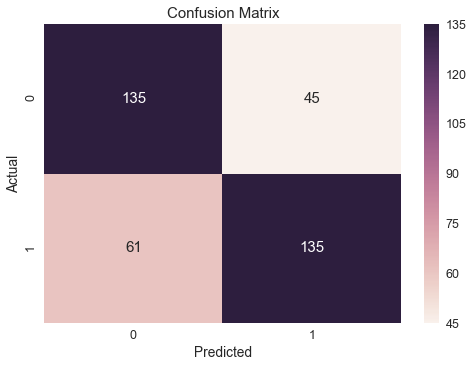

Accuracy: 0.718085106383
Classification Error: 0.281914893617
False Positive Rate: 0.25
Precision: 0.75


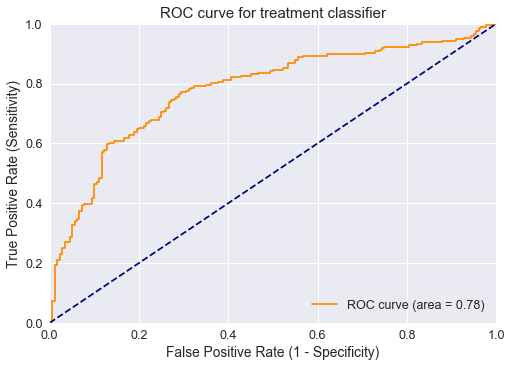

In [177]:
#import LogisticRegression 
from sklearn.linear_model import LogisticRegression

#defining a Decision tree classifier function with tuning
def logisticReg():
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    lr_pred = lr.predict(X_test)
    acc_score = evalClassModel(lr, y_test, lr_pred) #Calling generalized evaluation function confusion metrix and ROC Curve
    
    #Data for final graph
    methodDict['Logistic Regression'] = acc_score * 100

logisticReg()

## Self Implementation of Logistic Regression

In this section, we will be implemeting logistic regression. **The objective is to create our own implementation using Numpy package**. Given the set of inputs, Logistic Regression models the probability of each input to be either 0 or 1. 

To generate probabilities, logistic regression uses a function (a link function) that gives outputs between 0 and 1 for all values of inputs. The link function for logistic regression is **Sigmoid Function**.

![title](equations-logit-sigmoid.png)

#### Steps for implementation:
1. **Implement Sigmoid function**
2. **Implement Loss/ Cost function** - It figures out how well weights are doing by mapping input values onto a real number intuitively representing some "cost".
3. **Implement Gradient Descent** - The goal is to minimize the loss function by adjusting (increasing/ decreasing) the weights by finding out the partial derivative of loss function with respect to each weight.
4. **Find optimal theta vlaue** - Once we get the values to be adjusted in the weights, we update the weights by substracting to them the derivative times the learning rate. Repeat this steps several times until we reach the optimal solution.

To implement Logistic Regression, we have created a class LogisticRegressionImplementation which has functions like sigmoid, loss and predict etc. mocking the sklearn's Logistic Regression package.

**References:** 
1. https://beckernick.github.io/logistic-regression-from-scratch/
2. https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac
3. https://en.wikipedia.org/wiki/Logistic_regression

In [178]:
#Implementation of Logistic Regression
class LogisticRegressionImplementation:
    
    #Initialize learning rate, iterations and fit intercept with default values when class is called
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
    
    #this function adds intercept to predict probability. Intercept is the y value when all X's are 0
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    #The sigmoid function that will give output value between 0 and 1 for all inputs
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    #Loss function to check goodness of weights
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    #Fit will take predictor and response variables and will try to find the optimal theta value by minimizing loss function 
    #using gradient descent
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        # weights initialization
        self.theta = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            #implement gradient descent
            gradient = np.dot(X.T, (h - y)) / y.size
            #theta value
            self.theta -= self.lr * gradient
            
    #This function predicts the pobability by passing dot product of theta transpose and input value to sigmoid function
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.theta))
    
    #get predicted value - 0 or 1 based on threshold set
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [179]:
# Evaluating Self implemeted Logistic Regression 
self_lr = LogisticRegressionImplementation(lr=0.1, num_iter=30000)
self_lr.fit(X_train, y_train)
self_lr_pred = self_lr.predict(X_test, 0.5)

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,self_lr_pred))

             precision    recall  f1-score   support

          0       0.56      0.94      0.70       180
          1       0.85      0.31      0.46       196

avg / total       0.71      0.61      0.57       376



### Accuracy is similar to inbuilt library for logistic regression ~ 71%

## Extra Tree Classifiler

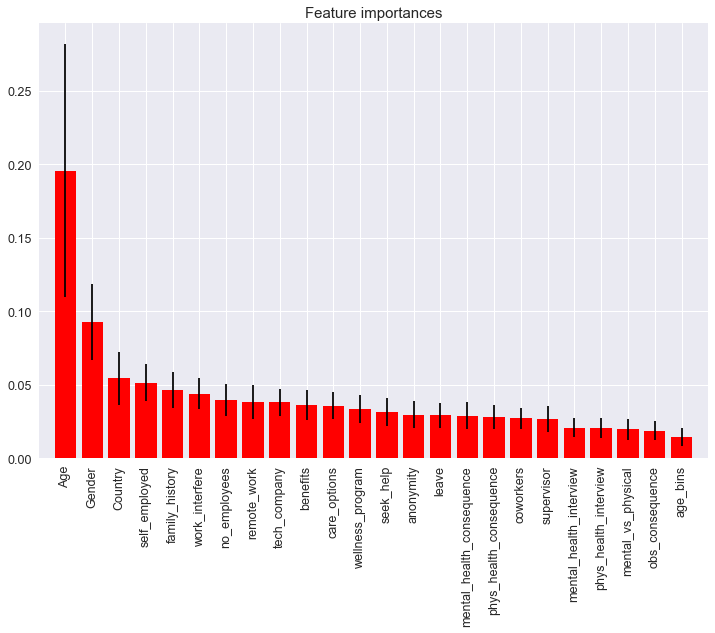

In [180]:
# Build a Extra Tree classifier and compute feature importances
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=250, random_state=0)

et.fit(X_train, y_train)
importances = et.feature_importances_
std = np.std([tree.feature_importances_ for tree in et.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X_train.shape[1]):
    labels.append(X_train.columns[f])      
    
# Plot the feature importances of the Extra Tree Classifier
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()

#### <center>Most importance features: Age, Gender, Country, self_employed 

In [181]:
# Creating a function for tuning for Decision tree and Randomforest Classifiers
# Idea taken from https://www.kaggle.com/kairosart/machine-learning-for-mental-health
from sklearn.model_selection  import RandomizedSearchCV

def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X_train, y_train)
    rand.cv_results_
    
    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X_train, y_train)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

## DecisionTree Classifier

Rand. Best Score:  0.834285714286
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 17, 'min_samples_leaf': 7, 'min_samples_split': 2}
[0.83999999999999997, 0.83999999999999997, 0.83299999999999996, 0.83999999999999997, 0.82699999999999996, 0.83399999999999996, 0.80900000000000005, 0.83499999999999996, 0.80300000000000005, 0.83799999999999997, 0.83799999999999997, 0.83999999999999997, 0.83999999999999997, 0.83999999999999997, 0.83999999999999997, 0.83999999999999997, 0.82299999999999995, 0.83799999999999997, 0.83999999999999997, 0.82199999999999995]
########### DecisionTree classifier ###############


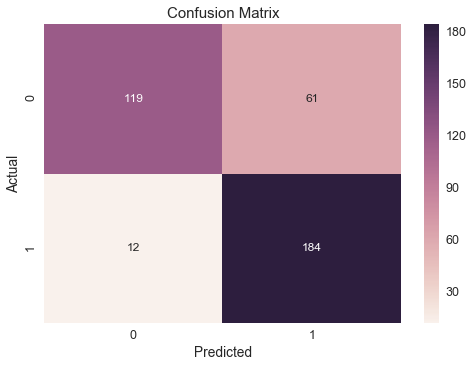

Accuracy: 0.80585106383
Classification Error: 0.19414893617
False Positive Rate: 0.338888888889
Precision: 0.751020408163


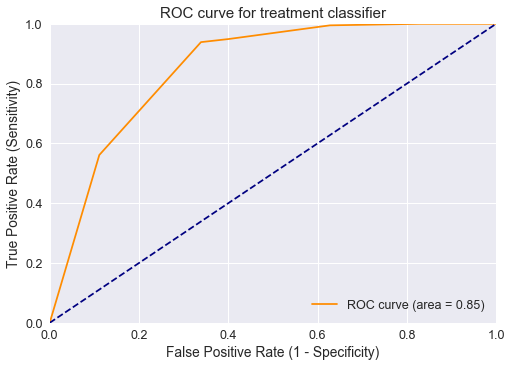

In [182]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

#defining a Decision tree classifier function with tuning
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = X_train.columns.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(tree, param_dist)  #calling fuction to tune decision tree model
    
    # train a decision tree model on the training set as per best tuned parameters
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=2, max_features=17, criterion='entropy', min_samples_leaf=7)
    tree_model = tree.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = tree_model.predict(X_test)
    
    print('########### DecisionTree classifier ###############')    
    
    acc_score = evalClassModel(tree, y_test, y_pred_class) #Calling generalized evaluation function confusion metrix
                                                           #and ROC Curve    
    #Data for final graph
    methodDict['Decision Tree'] = acc_score * 100

    
treeClassifier()

## RandomForest Classifier

Rand. Best Score:  0.84
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 16, 'min_samples_leaf': 6, 'min_samples_split': 8}
[0.83999999999999997, 0.83999999999999997, 0.83999999999999997, 0.83999999999999997, 0.83999999999999997, 0.84099999999999997, 0.83999999999999997, 0.83999999999999997, 0.84099999999999997, 0.83999999999999997, 0.83999999999999997, 0.83999999999999997, 0.83999999999999997, 0.84699999999999998, 0.84099999999999997, 0.83999999999999997, 0.83999999999999997, 0.83999999999999997, 0.84299999999999997, 0.83999999999999997]
########### Random Forests ###############


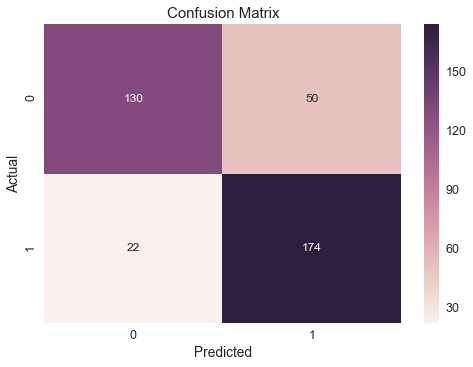

Accuracy: 0.808510638298
Classification Error: 0.191489361702
False Positive Rate: 0.277777777778
Precision: 0.776785714286


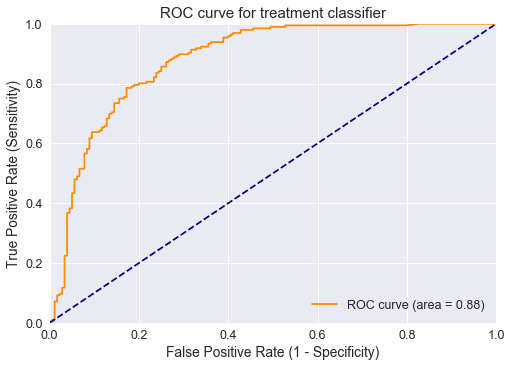

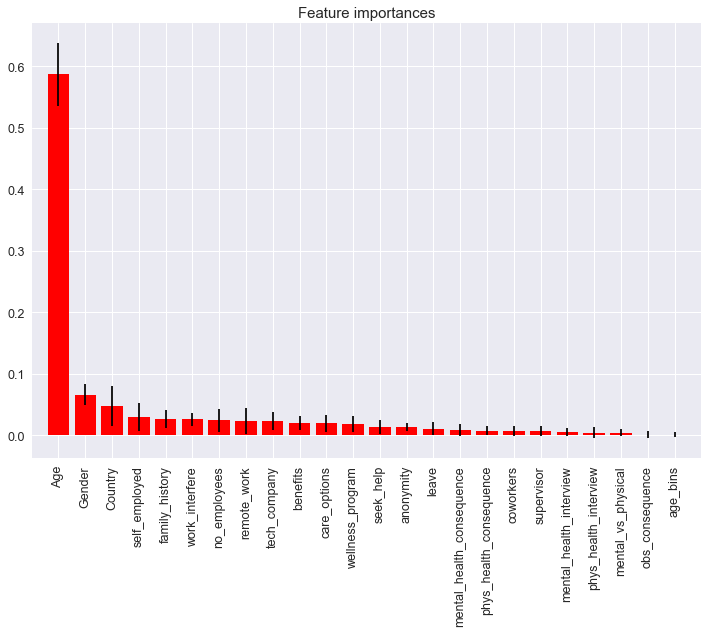

In [183]:
from sklearn.ensemble import RandomForestClassifier

def rfClassifier():
    # Calculating the best parameters
    rf = RandomForestClassifier(n_estimators = 20)

    featuresSize = X_train.columns.__len__()
    param_dist = {"max_depth": [3, None],
                  "max_features": randint(1, featuresSize),
                  "min_samples_split": randint(2, 9),
                  "min_samples_leaf": randint(1, 9),
                  "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(rf, param_dist)  #calling fuction to tune RandomForest model

    # Building and fitting RandomForest classifier with best parameters
    rf = RandomForestClassifier(criterion='entropy', max_features = 16, min_samples_leaf=6, 
                                               min_samples_split=8, n_estimators = 20, random_state=2)
    rf_model = rf.fit(X_train, y_train)    
        # make class predictions for the testing set
    rf_pred = rf_model.predict(X_test)

    print('########### Random Forests ###############') 
    
    acc_score = evalClassModel(rf, y_test, rf_pred)  #Calling generalized evaluation function confusion matrix
                                                         #and ROC Curve    
    #Data for final graph
    methodDict['RandomForest'] = acc_score * 100
    
    # Important features from RandomForest Classifier
    importances = rf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rf.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    labels = []
    for f in range(X_train.shape[1]):
        labels.append(X_train.columns[f])      

    # Plot the feature importances of the forest
    plt.figure(figsize=(12,8))
    plt.title("Feature importances")
    plt.bar(range(X_train.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X_train.shape[1]), labels, rotation='vertical')
    plt.xlim([-1, X_train.shape[1]])
    plt.show()
   
    
rfClassifier()

#### <center> Best Parameters from model: Age, Gender, Country, self_employed, family_history

## Bagging Classifier

########### Bagging ###############


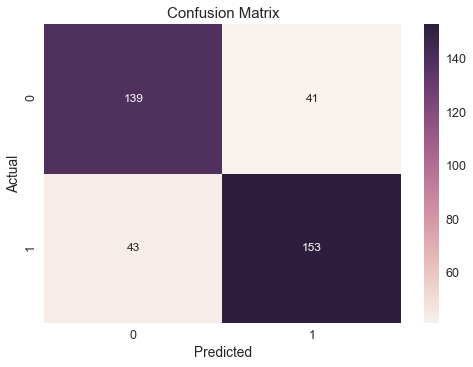

Accuracy: 0.776595744681
Classification Error: 0.223404255319
False Positive Rate: 0.227777777778
Precision: 0.788659793814


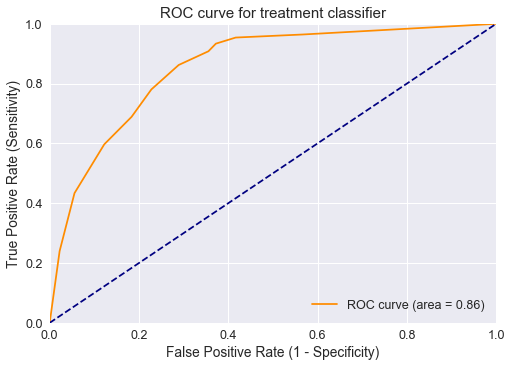

In [184]:
from sklearn.ensemble import BaggingClassifier

def bagging():
    # Building and fitting 
    bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
    bag.fit(X_train, y_train)
    
    # make class predictions for the testing set
    bag_pred = bag.predict(X_test)
    
    print('########### Bagging ###############')   
    
    acc_score = evalClassModel(bag, y_test, bag_pred) #Calling generalized evaluation function confusion metrix
                                                      #and ROC Curve    
    #Data for final graph
    methodDict['Bagging'] = acc_score * 100    

bagging()

## Boosting/AdaBoost

########### Boosting ###############


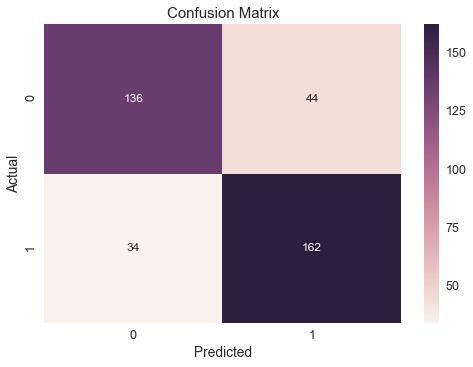

Accuracy: 0.792553191489
Classification Error: 0.207446808511
False Positive Rate: 0.244444444444
Precision: 0.78640776699


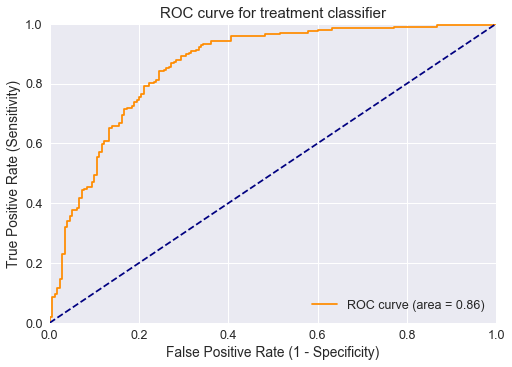

In [185]:
from sklearn.ensemble import AdaBoostClassifier

def boosting():
    # Building and fitting 
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
    boost.fit(X_train, y_train)
    
    # make class predictions for the testing set
    boost_pred = boost.predict(X_test)
    
    print('########### Boosting ###############')
    
    acc_score = evalClassModel(boost, y_test, boost_pred) #Calling generalized evaluation function confusion metrix
                                                          #and ROC Curve    
    #Data for final graph
    methodDict['Boosting'] = acc_score * 100

boosting()

## Success plot for all methods

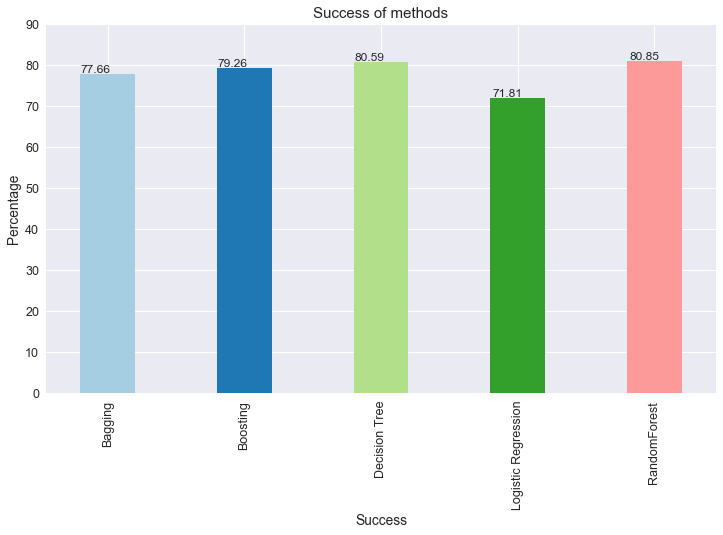

In [186]:
def plotSuccess():
    s = pd.Series(methodDict)
    
    #Colors
    ax = s.plot(kind='bar',
                color=[plt.cm.Paired(np.arange(len(s)))],
                width=0.4,
                figsize=(12,6.8)) 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([0.0, 90.0])
    plt.xlabel('Success')
    plt.ylabel('Percentage')
    plt.title('Success of methods')
     
    plt.show()

plotSuccess()

### Conclusion from Machine Learning models:
<b>Best Accuracy: 80.85%<br>
Best Model: RandomForest<br>
Most important features to consider:<br>
    Age<br>
    Gender<br>
    Country<br>
    self_employed<br>
    family_history<br> </b>

## Recommendations
### For Employers –
1. More than 50% of employees are suffering from mental health issues. So, employers should mandate the provision health programs to its employees
2. Allow flexible work environment – Flexible scheduling, Modified break schedule, Work from home/Flexi-place
3. Provide day-to-day guidance and feedback. Also, positive praise and reinforcement will be beneficial to employees
4. This type of prediction model can be used in finding key factors for other issues within the organization
##### Most of these recommendations will lead to policy changes in the organization which is subject to various factors like country policy, size of organization, employee data privacy etc. 
 
### For Employees –
1. Employees should talk to employers about their mental health issues so that they can aid them with benefit provisions like working from home, extra leaves etc.
2. Employees should be aware of their health coverage and aid programs provided by their employer and should actively participate in any wellness program.
3. Proper feedback should be given related to effectiveness of the employer’s health program while leaving the organization. This might help in improving existing health policies.